## Data Dictionary

PassengerId - Passenger Unique ID

survival - Survival (0 = No; 1 = Yes)

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Processing

In [2]:
# load the data
data = pd.read_csv('train.csv')

In [3]:
# first five rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Visualization

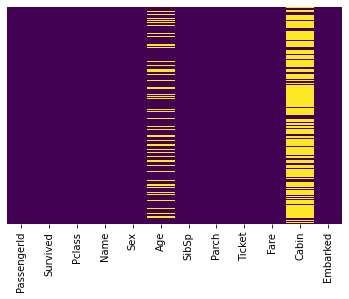

In [5]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [6]:
sns.set_style("whitegrid")

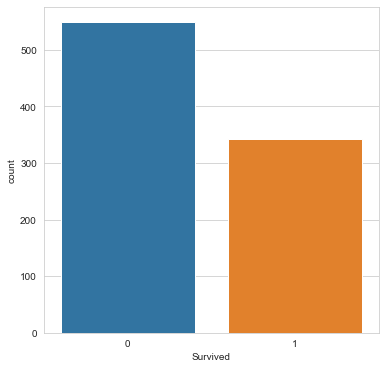

In [7]:
plt.figure(figsize = (6,6))
sns.countplot(data.Survived)
plt.show()

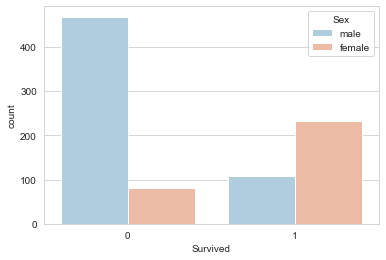

In [8]:
sns.countplot(data.Survived, hue = data.Sex, palette = 'RdBu_r')
plt.show()

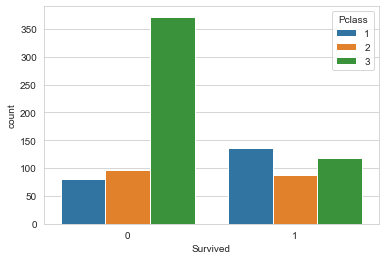

In [9]:
sns.countplot(data.Survived, hue = data.Pclass)
plt.show()

<AxesSubplot:xlabel='Age'>

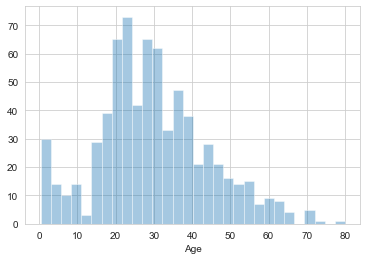

In [10]:
sns.distplot(data.Age.dropna(), kde = False, bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

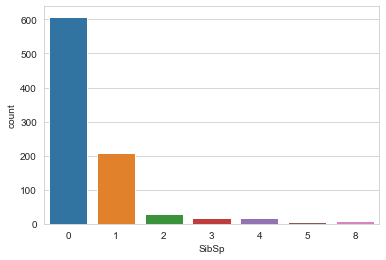

In [11]:
sns.countplot(data.SibSp)

<AxesSubplot:>

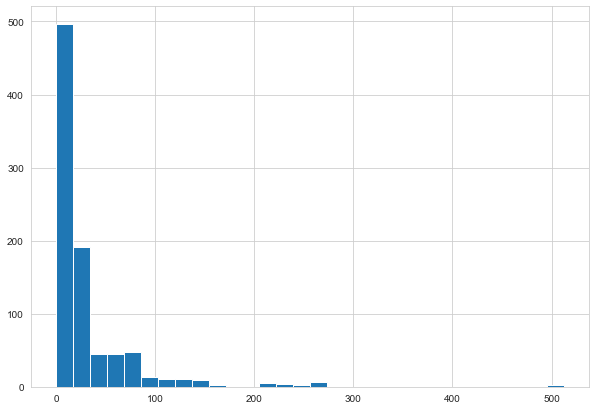

In [12]:
data['Fare'].hist(bins = 30, figsize = (10,7))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

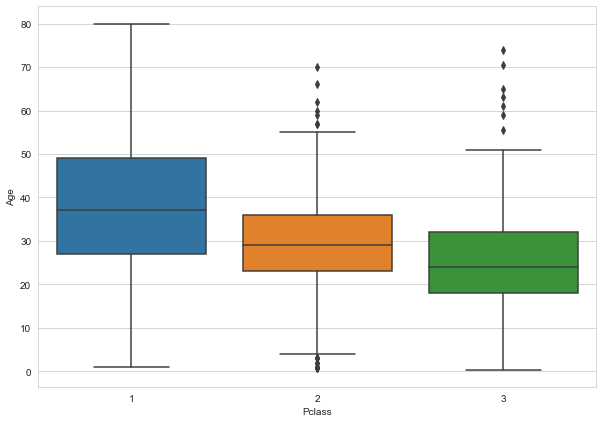

In [13]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = data)

In [14]:
data[data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [15]:
def ImputeAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
# Fill Age missing values
data['Age'] = data[['Age', 'Pclass']].apply(ImputeAge, axis = 1)

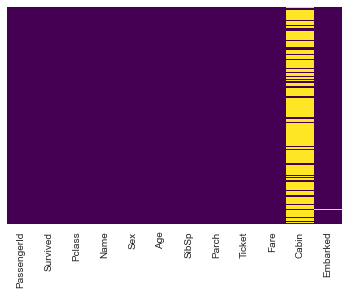

In [17]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [18]:
# Drop Cabin Column
data.drop('Cabin', axis = 1, inplace = True)

In [19]:
# Drop rows contain null values
data.dropna(inplace = True)

In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Encoding Categorical Columns

In [21]:
sex = pd.get_dummies(data['Sex'], drop_first= True)

In [22]:
embarked = pd.get_dummies(data['Embarked'], drop_first = True)

In [23]:
data = pd.concat([data,sex, embarked], axis = 1)

In [24]:
data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [25]:
data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


## Separating Features and Target

In [26]:
X = data.drop('Survived', axis = 1)
Y = data['Survived']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

## Model Training

### Logistic Regression

In [28]:
model = LogisticRegression()

In [29]:
# training the model
model.fit(x_train, y_train)

LogisticRegression()

### Model Evaluation

In [30]:
predictions = model.predict(x_test)

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [32]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)